# Plotting ROC Curves

The `ceeksw.plotting` package contains a class which wraps [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) together with some plotting functionality in order to present multiple ROC curves on a figure and compare them by ration of false positive rate.

In [1]:
from geeksw.plotting import RocPlot
import matplotlib.pyplot as plt

We just create an example classification problem for this demostration:

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
random_state = 42
X, y = make_classification(n_samples=100000, n_informative=5, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

Import the models we want to train and compare and fit them:

In [4]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [5]:
reg = LogisticRegression(solver="lbfgs").fit(X_train, y_train)
y_test_preds_reg = reg.predict_proba(X_test)[:,1]

In [6]:
bst = XGBClassifier().fit(X_train, y_train)
y_test_preds_xgb = bst.predict_proba(X_test)[:,1]

Now on to re ROC curve. When you create a `ROC curve`, the grid with the two subplots will be initialized, and with every call to `RocPlot.plot()` you draw a new curve. In the ratio subplot, they will be compared to the first one you plotted as a reference.

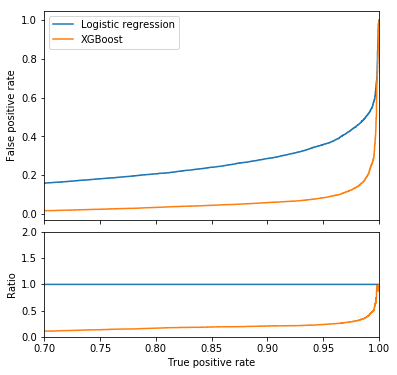

In [7]:
plt.figure(figsize=(6,6))
roc = RocPlot(xlim=(0.7,1.0), rlim=(0.0, 2.0))
roc.plot(y_test, y_test_preds_reg, label="Logistic regression")
roc.plot(y_test, y_test_preds_xgb, label="XGBoost")